<a href="https://colab.research.google.com/github/teruyuki-yamasaki/Sounds/blob/main/musicnotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

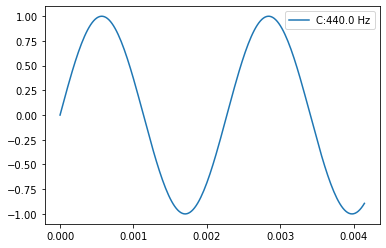

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import IPython

rate=48000
duration:float=1.0
C_freq = 440.0 

def make_note(freq:float=440.0, duration:float=1.0, rate:int=48000):
    t = np.linspace(0., duration, int(rate*duration))
    x = np.sin(2.0 * np.pi * freq * t)
    return x    

C = make_note(C_freq) 

t0 = 0; tf = 200
t = np.linspace(0., duration, int(rate*duration))
plt.plot(t[t0:tf],C[t0:tf], label=f'C:{C_freq} Hz')
plt.legend() 
plt.show()

IPython.display.Audio(C, rate=rate, autoplay=True)

In [ ]:
res = [] 
for i in range(13):
    res.append(make_note(C_freq * 2 ** (i/12)))
octave = np.concatenate(res,0) 
IPython.display.Audio(octave, rate=rate, autoplay=True)

In [32]:
import numpy as np
import IPython

rate=48000
duration:float=1.0

C_freq = 440.0 
notes_name = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'] 
notes_freq = [C_freq * 2 ** (i/12) for i in range(12)] 
freq_dict = dict({name: freq for name, freq in zip(notes_name, notes_freq)}) 
freq_dict['O'] = 0. # rest 

def name2freq(name:str):
    if name in freq_dict.keys(): 
        return freq_dict[name]

    else:
        key = name[:-2]               # ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'] 
        o = int(name[-1])             # how many octaves below/above 
        l_or_h = name[-2]             # lower/higher
        sign = -1 if l_or_h=='l' else 1 # below/above 
        return freq_dict[key] * 2 ** (o * sign)

def freq2array(freq:float=440.0, duration:float=1.0, rate:int=48000):
    t = np.linspace(0., duration, int(rate*duration))
    x = np.sin(2.0 * np.pi * freq * t)
    return x    

def play(notes:list):
    res = [] 
    for name in notes:
        freq = name2freq(name)
        array = freq2array(freq)
        res.append(array)
    res = np.concatenate(res,0)
    return res 

In [36]:
# basic notes 
notes = ['C', 'D', 'E', 'F', 'G', 'A', 'B'] 
print(notes)
arr = play(notes) 
IPython.display.Audio(arr, rate=rate, autoplay=True)

['C', 'D', 'E', 'F', 'G', 'A', 'B']


In [37]:
# scale notes 
notes = ['C', 'D', 'E', 'F', 'G', 'A', 'B'] 
lower_notes = [name+'l1' for name in notes] 
higher_notes = [name+'h1' for name in notes] 
three_octaves = lower_notes+['O']+notes+['O']+higher_notes
print(three_octaves)
arr = play(three_octaves)
IPython.display.Audio(arr, rate=rate, autoplay=True)

['Cl1', 'Dl1', 'El1', 'Fl1', 'Gl1', 'Al1', 'Bl1', 'O', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'O', 'Ch1', 'Dh1', 'Eh1', 'Fh1', 'Gh1', 'Ah1', 'Bh1']


In [38]:
# play a song 
melody = ['B'] 
melody += ['Eh1', 'Gh1', 'F#h1', 'Eh1', 'Bh1', 'Ah1', 'F#h1'] 
melody += ['Eh1', 'Gh1', 'F#h1', 'D#h1', 'Fh1', 'B', 'B', 'B', 'B']
print('melody = ', melody) 
arr_melody = play(melody)

chord = ['O'] 
chord += ['E']*7
chord += ['E', 'E', 'E', 'D#', 'Bl1', 'E', 'G', 'B', 'Bl1']
print('chord = ', chord) 
arr_chord = play(chord) 

arr = arr_melody + arr_chord * 2
IPython.display.Audio(arr, rate=rate, autoplay=True)

melody =  ['B', 'Eh1', 'Gh1', 'F#h1', 'Eh1', 'Bh1', 'Ah1', 'F#h1', 'Eh1', 'Gh1', 'F#h1', 'D#h1', 'Fh1', 'B', 'B', 'B', 'B']
chord =  ['O', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D#', 'Bl1', 'E', 'G', 'B', 'Bl1']
